### Read file and save data in a suitable data structure
Clean and process data stored in text files containing measurements of two pokemons, Pikachu and Pichu. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt 

# Source reference: chatgpt, youtube, w3schools  
# Function that takes in a single argument which is the patch to a text file
def clean_data(textfile_path):
    # Initializes an empty list 
    cleaned_data_list = []
    # Opens specified file in read mode
    with open(textfile_path, "r") as file:
        # Skips the first line 
        next(file)
        # Iterates over the remaining lines 
        for line in file:
            # Remove () and split line by ,
            measuresments = line.strip("()\n").split(", ")
            # Converts to float 
            measurements_to_float = np.array([float(m) for m in measuresments])                           
            # Adds updated data to cleaned_data_list
            cleaned_data_list.append(measurements_to_float)
        # Convert cleaned_data_list to a numpy-array
        cleaned_data_array = np.array(cleaned_data_list)
        return cleaned_data_array
        
pikachu_data = clean_data("pikachu.txt")
pichu_data = clean_data("pichu.txt")


### Plot all points in different colors in the same window 
Defines a function to plot Pikachus and Pichus width and height with scatter. 

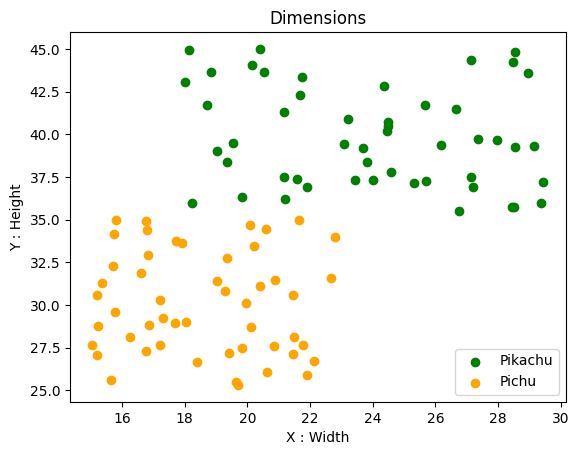

In [28]:
# Function for plotting all points
def plot_points(data, color, label):
    # Extract x-coordinates from data 
    x = data[:, 0]
    # Extract y-coordinates from data 
    y = data[:, 1]
    # Scatter plot the points with specified color and label
    plt.scatter(x,y, color=color, label=label)

# Plot points where green is Pikachu and orange is Pichu
plot_points(pikachu_data, color="green", label="Pikachu")
plot_points(pichu_data, color="orange", label="Pichu")

# Set title
plt.title("Dimensions")
# Set label for x
plt.xlabel ("X : Width")
# Set label for y
plt.ylabel("Y : Height")
# Add legend to the plot and position it in the lower right corner
plt.legend(loc="lower right")

### Combining data
Function that combines Pikachu and Pichu data, assigning a label 0 får Pikachu and 1 for Pichu. 

In [23]:
def labels_to_data(pikachu_data, pichu_data):
    # Initializes list for storing data
    combined_data = []
    # Add label to pikachu_data
    for data_point in pikachu_data:
        combined_data.append(list(data_point) +[0])
    # Add label to pichu_data
    for data_point in pichu_data:
        combined_data.append(list(data_point) +[1])
    # Returns numpy-array with combined_data
    return np.array(combined_data)

# Call function
combined_data = labels_to_data(pikachu_data, pichu_data)

### Read in test points
Reads data from text file with testpoints and store in variabel.
Converts the string data into a list of tuples.  

In [24]:
# Source reference: Kokchun  
# Opens file in read mode 
with open("test_points.txt", "r") as file:
    # Read file and store in test_data
    test_data = file.read()
# Converting into a list of tuples
test_data = eval(f"[{test_data}]")

### Calculate distance between test points and training data
Calculates the Euclidean distance between each test point and all points in combined_data. 
Finds the index of the point in combined_data that has the minimum distance to the current test point.

In [ ]:
for i, test_point in enumerate(test_data):
    # Calculate the distances between each point in combined_data and each test point in test_data
    distances = np.sqrt((combined_data[:,0] - test_point[0])**2 + (combined_data[:,1] - test_point[1])**2)
    # Finds the index of the point in combined_data that has the minimum distance to the current test point
    index = np.argmin(distances)
    print(f"Testpunkt {i+1}: Closest point is at index {index}, with distance {distances[index]}")
    # Determine the correct Pokémon based on the label of the closest point
    correct_pokemon = combined_data[index][2]
    if correct_pokemon == 0:
        print(f"It´s a Pikachu")
    else:
        correct_pokemon
        print(f"It´s a Pichu")

### Let the user enter a test point and determine its class
Calculates the Euclidean distance between the entered point and all points in the combined_data. 
Finds the index of the point in combined_data that has the minimum distance to the users test point.

In [ ]:
# Asking user for input 
try:
    x, y = map(float, input("Enter width and height").split())
except ValueError:
    print("Enter width and height separated by a space")
# Calculate the distances between each point in combined_data and users input
distances = np.sqrt((combined_data[:,0] - x)**2 + (combined_data[:,1] - y)**2)
index = np.argmin(distances)
# Determine the correct Pokémon based on the label of the closest point
correct_pokemon = combined_data[index][2]
if correct_pokemon == 0:
    print(f"It´s a Pikachu")
else:
    print(f"It´s a Pichu")


### Classification with majority class
Calculates the Euclidean distance between test points and all points in combined_data. 
Identifies the five nearest points to each test point and determines the majority class among their labels.

In [ ]:
from collections import Counter

# Create an empty list to store results 
results = []

for i, test_point in enumerate(test_data):
    # Calculate the distances between each point in combined_data and each test point in test_data
    distances = np.sqrt((combined_data[:,0] - test_point[0])**2 + (combined_data[:,1] - test_point[1])**2)
    # Get index of the five nearest points
    closest_index = np.argsort(distances)[:5]
    # Get labels
    labels = combined_data[closest_index, 2]
    # Count labels of the nearest points
    label_counter = Counter(labels)
    # Determine the majority class of the nearest points
    majority_class = label_counter.most_common(1)[0][0]
    # Add test point index and its majority class tho the list 
    results.append((i, majority_class))

# Print the results 
for test_point_index, majority_class in results:
    if majority_class == 0:
        print(f"Test point {test_point_index + 1} is a Pikachu")
    else:
        print(f"Test point {test_point_index + 1} is a Pichu")